In [1]:
# markdown = """\
# - [g] Goal
#   - [q] What should we do?
#     - [a] Alternative 1 ^alt1
#     - [a] Alternative 2 ^alt2
#     - [D] Decision: A1 [[#^alt1]]
# """


# markdown = """\
# - [g] Add syntax highlighting for Cannonball markdown ^feature3
# 	- [?] Which **library** should we use for highlighting? ^q1
# 		- [a] Use Prism.js ^alt1
# 			- [o] Has good React integration
# 			- [P] May need custom language definition
# 				- [ ] Research custom grammar in Prism
# 		- [a] Use highlight.js ^alt2
# 			- [o] More lightweight
# 			- [o] Easier to customize
# 		- [D] Selected [[#^alt2]]
# """

markdown = """\
- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which **library** should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected [[#^alt2]]
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
			- [ ] Add custom rules for node types
			- [ ] Connect to rendering pipeline
		- [I] Could add visual indicators for different node states
		- [ ] Write tests for highlighting edge cases
"""

with open("../assets/example_graph.md", "r") as f:
    markdown = f.read()

In [ ]:
from cannonball.graph_mgr import GraphMgr
from pprint import pprint

cannon_graph = GraphMgr.from_markdown(markdown, allow_cycles=True)
print(cannon_graph.to_markdown(indent="\t"))

pprint(cannon_graph.to_dict())

- [g] I want to create an AI-powered productivity system based on the following concepts:
	- **DAG**: The system is based on nodes and edges in a directed acyclic graph (DAG). 
	- **Markdown**: The current state of the DAG can be represented as a hierarchical bullet point list in Markdown format, with some custom additions to define different node types and represent back-linking (which wouldn't be possible with indented lists, as they are equivalent to tree structures)
	- **Graph rewriting**: Work on any project using this system can be expressed by manipulating the graph: expanding nodes, removing nodes, modifying edges, etc. Special rules ensure that the graph always remains in a valid state. 
	- **Non-destructive changes**: These graph manipulations need to be non-destructive, i.e. we track the changes to the graph and can roll back to any previous state. 
	- **Artefacts**: Some nodes produce Artefacts as part of their processing. Artefacts can be of different types, such as Knowle

In [ ]:
def unidiff_output(expected, actual):
    """
    Helper function. Returns a string containing the unified diff of two multiline strings.
    """

    import difflib

    expected = expected.splitlines(1)
    actual = actual.splitlines(1)

    diff = difflib.unified_diff(expected, actual, fromfile="original", tofile="to_markdown()")

    return "".join(diff)


print(unidiff_output(markdown, cannon_graph.to_markdown(indent="\t")))
assert markdown == cannon_graph.to_markdown(indent="\t"), "Markdown output does not match original"

AttributeError: 'bool' object has no attribute 'items'

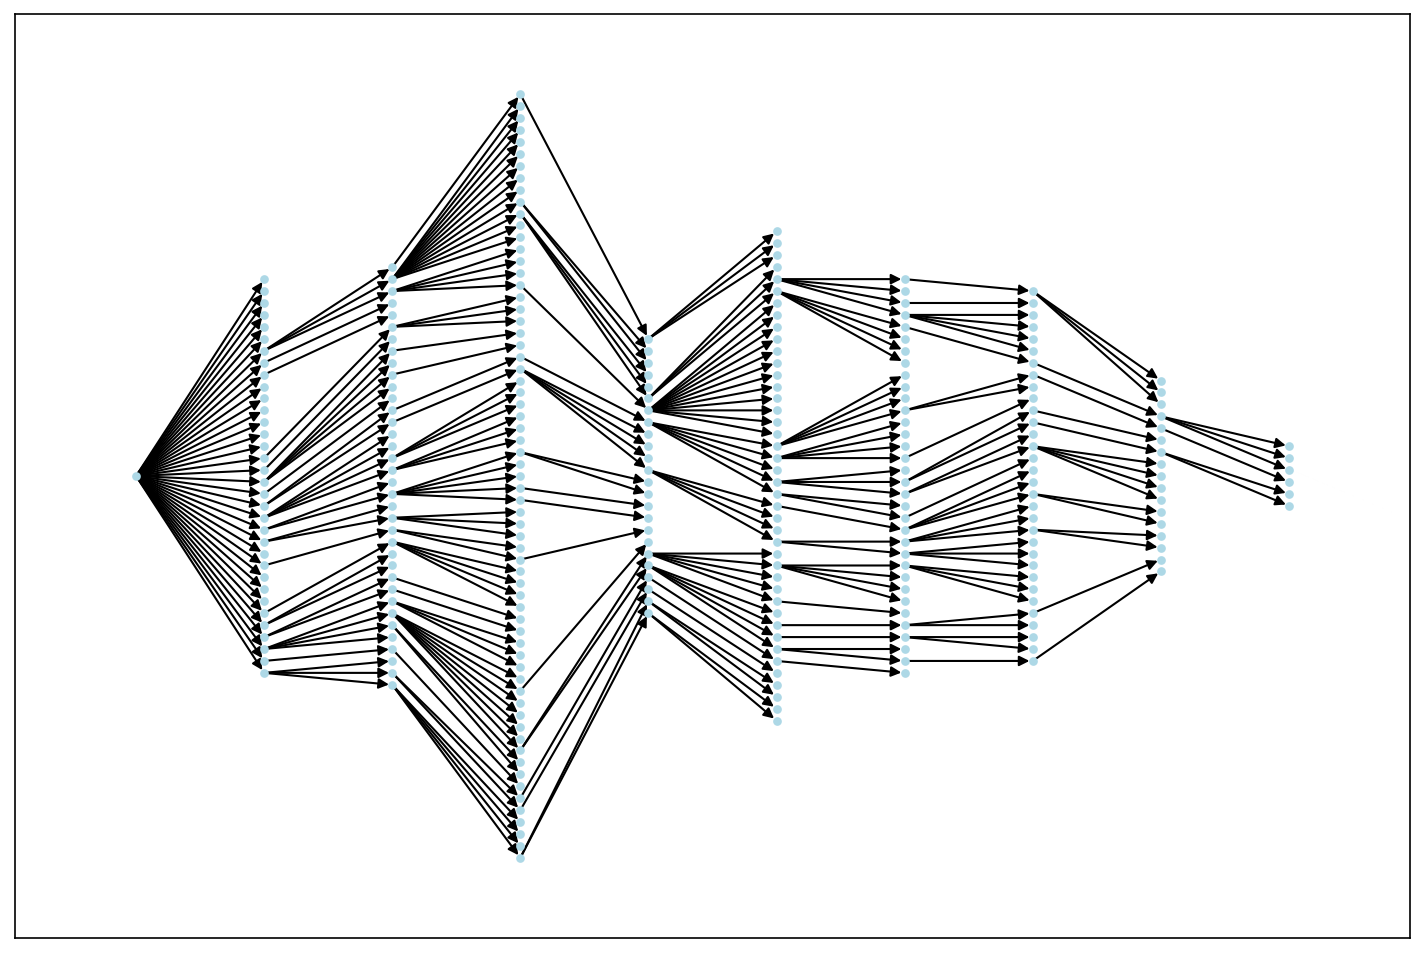

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

sub_graph = cannon_graph.get_subgraph_by_edge_type("requires")

G = sub_graph.graph

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

markers = nx.get_node_attributes(G, "marker")
text = nx.get_node_attributes(G, "name")

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
nx.draw_networkx(G, pos=pos, ax=ax, labels=False, node_size=10, node_color="lightblue", font_size=8)
ax.set_title("DAG layout in topological order")
fig.tight_layout()

# Get a list of edges with type="requires"
requires_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get("type") == "requires"]
# plot edges in red
nx.draw_networkx_edges(G, pos=pos, edgelist=requires_edges, edge_color="red", width=2)

# draw edge labels
edge_labels = nx.get_edge_attributes(G, "type")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, ax=ax, font_size=8)